<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/reinforcement_learning/classical_q_learning_frozen_lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import gym

In [3]:
from gym.envs.registration import register

try:
  register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4','is_slippery':False},
    max_episode_steps=100,
    reward_threshold=0.78,  
  )
except:
 print('Already Registered') 

In [4]:
from IPython.display import clear_output

In [5]:
env = gym.make('FrozenLakeNotSlippery-v0')
env.reset()

for step in range(15):
  env.render()
  action = env.action_space.sample()
  observation,reward,done,info = env.step(action)
  time.sleep(0.2)
  clear_output(wait=True)

  if done:
    break

env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [6]:
action_size = env.action_space.n
state_size = env.observation_space.n #observation is same as state


In [7]:
action_size # means 4 action up, down, left, right

4

In [8]:
state_size

16

In [9]:
#rows --> states columns--> actions?
q_table = np.zeros([state_size,action_size])

In [10]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [11]:
EPOCHS=20000 # how many times agent plays the game menas hitting with done


In [12]:
ALPHA = 0.8 #learning rate
GAMMA = 0.95 #DISCOUNT RATE 

In [13]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

In [14]:
def epsilon_greedy_action_selection(epsilon,q_table,discrete_state):

  random_number = np.random.random()

  #exploitation (choose the action that maximizes the Q)
  if random_number > epsilon: # in starting exploration works but later epsilon value starts to decrease as they are in [0 to 1] once 0.65 > .70 example exists this cell run

    state_row = q_table[discrete_state,:]  #discrete state here are 16 so grab that row  
    # example it looks like this[0,0.1,0,0] and in terms of actions it looks loke this [0,1,2,3]

    #the action will return the [0.1] or action 1
    action = np.argmax(state_row) # grab the maximum index location of that row

  #exploration (choose the random action)
  else:
    action = env.action_space.sample()

  return action

In [15]:
def compute_next_q_value(old_q_value,reward,next_optimal_q_value):

  return old_q_value + ALPHA * (reward + GAMMA *next_optimal_q_value - old_q_value)

In [16]:
def reduce_epsilon(epsilon,epoch):

  return min_epsilon + (max_epsilon-min_epsilon) * np.exp(-decay_rate*epoch)

In [17]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

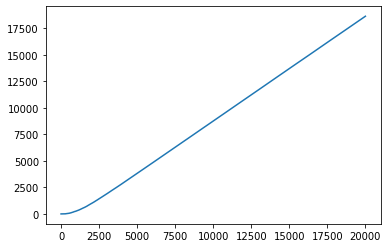

In [18]:
rewards = []
log_interval = 1000

#########
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
epoch_plot_tracker=[]
total_reward_plot_tracker = []
#########
for episode in range(EPOCHS):

  state = env.reset()
  done = False
  total_rewards = 0

#agent plays the game
  while not done:
    
    #ACTION
    action = epsilon_greedy_action_selection(epsilon, q_table, state) # above we defined as normal state

    #state,rewrds .... env.step
    new_state,reward,done,info = env.step(action)


    #old (current)q value Q(st,at)
    old_q_value = q_table[state,action]

    #get next optimal q value ( max q value for this state) Q(st+1,at+1)
    next_optimal_q_value = np.max(q_table[new_state,:])

    #compute the next Q value
    next_q = compute_next_q_value(old_q_value,reward,next_optimal_q_value)

    #update the table
    q_table[state,action] = next_q

    #track rewards
    total_rewards = total_rewards + reward

    #new state is now the state
    state = new_state

#agent finshed round of the game
  episode += 1

  epsilon = reduce_epsilon(epsilon,episode)

  rewards.append(total_rewards)

  total_reward_plot_tracker.append(np.sum(rewards))
  epoch_plot_tracker.append(episode)


  if episode % log_interval == 0:
    ax.clear()
    ax.plot(epoch_plot_tracker,total_reward_plot_tracker)
    fig.canvas.draw()

env.close()

In [28]:
q_table

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77373141, 0.7737804 ],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [29]:
state = env.reset()

for steps in range(100):
  env.render()

  action = np.argmax(q_table[state,:])
  state,reward,done,info = env.step(action)

  time.sleep(1)

  clear_output(wait=True)

  if done:
    break

env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG
